In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_path = '../output/cropped_img.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

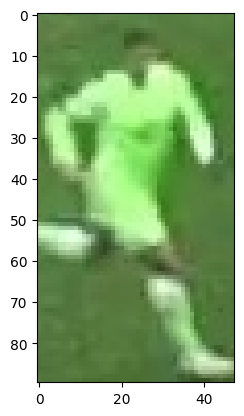

In [4]:
plt.imshow(img)

# Crop top half of image

In [ ]:
img.shape #h,w,rgb

(90, 48, 3)

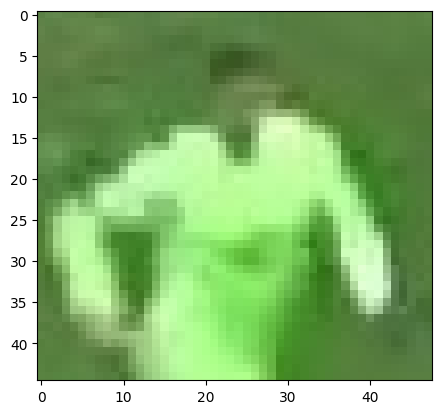

In [12]:
# height of img 
top_half_img = img[0:int(img.shape[0]/2), :]
plt.imshow(top_half_img)

## Cluster img into two colors to only get jersey color

In [25]:
img_2d = top_half_img.reshape(-1 ,3)
img_2d

array([[ 90, 128,  69],
       [ 96, 134,  75],
       [ 98, 136,  77],
       ...,
       [ 89, 127,  66],
       [ 89, 127,  66],
       [ 89, 127,  66]], dtype=uint8)

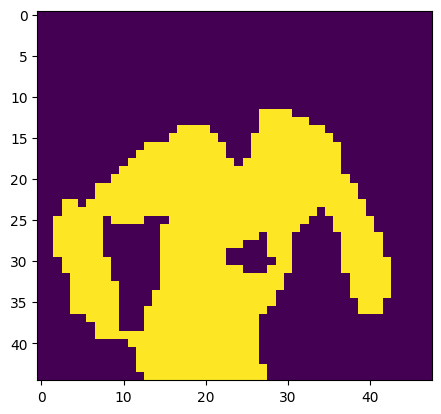

In [28]:
from sklearn.cluster import KMeans

# fit kmeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(img_2d)

# get cluster labels
labels = kmeans.labels_

# reshape the labels back into original size
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1]) #height, width

plt.imshow(clustered_img)

In [37]:
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]
# [bottom left, top right, top left, bottom right]

non_player_cluster = max(set(corner_clusters), key = corner_clusters.count)
print(non_player_cluster)

0


So player_cluster = 1

In [38]:
player_cluster = 1
kmeans.cluster_centers_[player_cluster] 

array([170.68622101, 236.23465211, 142.90859482])